<a href="https://colab.research.google.com/github/ft-abhx/ML_Project/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

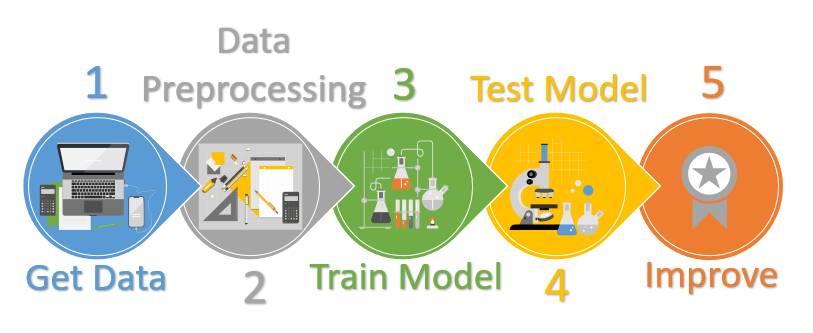

# Topics
1.   Naive Bayes Classification
2.   Label Encoding
1.   Using Dataset in Sklearn
2.   Advantages and Disadvantages
5. Implementation in Python








#1.Naive Bayes Classification

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ theorem states the following relationship, given class variable $y$ and dependent feature vector 
$x_1$ through $x_n$ :
\begin{equation}
P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots, x_n \mid y)}
                                 {P(x_1, \dots, x_n)}
\end{equation}

Since $P(x_1, \dots, x_n)$
 is constant given the input, we can use the following classification rule:
 \begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),\end{aligned}\end{align}
 and we can use Maximum A Posteriori (MAP) estimation to estimate $P(y)$  and $P(x_i \mid y)$ 
; the former is then the relative frequency of class $y$ in the training set.

The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i \mid y)$.




#2.Implementation from Scratch

## Input Data (https://github.com/Jayku88/Machine-Learning-Lab/blob/main/ResultStatus.csv)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ResultStatus.csv to ResultStatus.csv


## Convert to dataframe

import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['ResultStatus.csv']))

## Display input

In [ ]:
df

,RevisionStatus,ExamComplexity,Result
0,Not Revised,Easy,Pass
1,Revised,Easy,Pass
2,Not Revised,Hard,Fail
3,Revised,Hard,Fail
4,Revised,Medium,Pass
5,Not Revised,Medium,Fail
6,Not Revised,Easy,Fail
7,Revised,Hard,Pass
8,Revised,Medium,Fail
9,Not Revised,Medium,Pass


## Extracting Samples based on condition : Example

In [ ]:
df[(df['RevisionStatus'] == 'Not Revised')&(df['ExamComplexity'] == 'Medium')]

,RevisionStatus,ExamComplexity,Result
5,Not Revised,Medium,Fail
9,Not Revised,Medium,Pass


## Finding Prior and conditional probabilities

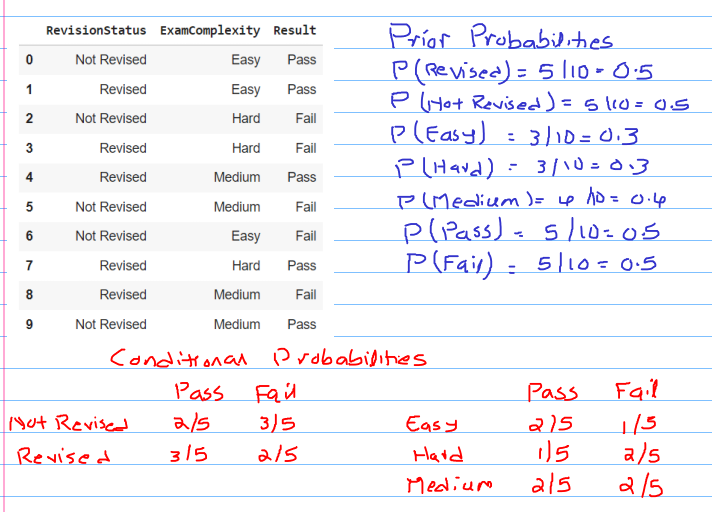

## Calculating Prior Probabilities using code

In [ ]:
notRevisedProbability=len(df[df['RevisionStatus'] == 'Not Revised'])/len(df)
revisedProbability=len(df[df['RevisionStatus'] == 'Revised'])/len(df)
easyProbability=len(df[df['ExamComplexity'] == 'Easy'])/len(df)
hardProbability=len(df[df['ExamComplexity'] == 'Hard'])/len(df)
mediumProbability=len(df[df['ExamComplexity'] == 'Medium'])/len(df)
passProbability=len(df[df['Result'] == 'Pass'])/len(df)
failProbability=len(df[df['Result'] == 'Fail'])/len(df)


## Calculating Conditional Probabilities using code

In [ ]:
notRevisedgivenPass=len(df[(df['RevisionStatus'] == 'Not Revised')&(df['Result'] == 'Pass')])/len(df[df['Result'] == 'Pass'])
revisedgivenPass=len(df[(df['RevisionStatus'] == 'Revised')&(df['Result'] == 'Pass')])/len(df[df['Result'] == 'Pass'])
notRevisedgivenFail=len(df[(df['RevisionStatus'] == 'Not Revised')&(df['Result'] == 'Fail')])/len(df[df['Result'] == 'Fail'])
revisedgivenFail=len(df[(df['RevisionStatus'] == 'Revised')&(df['Result'] == 'Fail')])/len(df[df['Result'] == 'Fail'])
easygivenPass=len(df[(df['ExamComplexity'] == 'Easy')&(df['Result'] == 'Pass')])/len(df[df['Result'] == 'Pass'])
easygivenFail=len(df[(df['ExamComplexity'] == 'Easy')&(df['Result'] == 'Fail')])/len(df[df['Result'] == 'Fail'])
hardgivenPass=len(df[(df['ExamComplexity'] == 'Hard')&(df['Result'] == 'Pass')])/len(df[df['Result'] == 'Pass'])
hardgivenFail=len(df[(df['ExamComplexity'] == 'Hard')&(df['Result'] == 'Fail')])/len(df[df['Result'] == 'Fail'])
mediumgivenPass=len(df[(df['ExamComplexity'] == 'Medium')&(df['Result'] == 'Pass')])/len(df[df['Result'] == 'Pass'])
mediumgivenFail=len(df[(df['ExamComplexity'] == 'Medium')&(df['Result'] == 'Fail')])/len(df[df['Result'] == 'Fail'])

## Prediction using Naive Bayes

In [ ]:
#Given Revised and Easy attributes
passRevisedEasy=revisedgivenPass*easygivenPass*passProbability
print(passRevisedEasy)
failRevisedEasy=revisedgivenFail*easygivenFail*failProbability
print(failRevisedEasy)
passRevisedEasynormalized=passRevisedEasy/(passRevisedEasy+failRevisedEasy)
failRevisedEasynormalized=failRevisedEasy/(passRevisedEasy+failRevisedEasy)
print(passRevisedEasynormalized)
print(failRevisedEasynormalized)
if passRevisedEasynormalized>failRevisedEasynormalized:
  print("Result is Pass")
else:
  print("Result is Fail")

0.12
0.04000000000000001
0.75
0.25000000000000006
Result is Pass


# 3.Implementing the above using Label Encoding and Gaussian Naive Bayes

## Using LabelEncoder

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
revisionstatusencoded=le.fit_transform(df['RevisionStatus'])
print(revisionstatusencoded) #0:Not Revised,1:Revised
examcomplexityencoded=le.fit_transform(df['ExamComplexity'])
print(examcomplexityencoded) #0:Easy,1:Hard,2:Medium
label=le.fit_transform(df['Result'])
print(label) #1:Pass, 0:Fail

[0 1 0 1 1 0 0 1 1 0]
[0 0 1 1 2 2 0 1 2 2]
[1 1 0 0 1 0 0 1 0 1]


## Combining different attributes to $1$ feature variable

In [ ]:
features=[(revisionstatusencoded[i],examcomplexityencoded[i]) for i in range(len(df))]
print(features)

[(0, 0), (1, 0), (0, 1), (1, 1), (1, 2), (0, 2), (0, 0), (1, 1), (1, 2), (0, 2)]


## Implementation in sklearn

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[1,0]]) # 1:Revised, 0:Easy
print("Predicted Value:", predicted) #)1:Pass, 0:Fail

Predicted Value: [1]


In Gaussian Naive Bayes

$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$

# 4.Assignment

Read the Person Classification Training and Testing phases

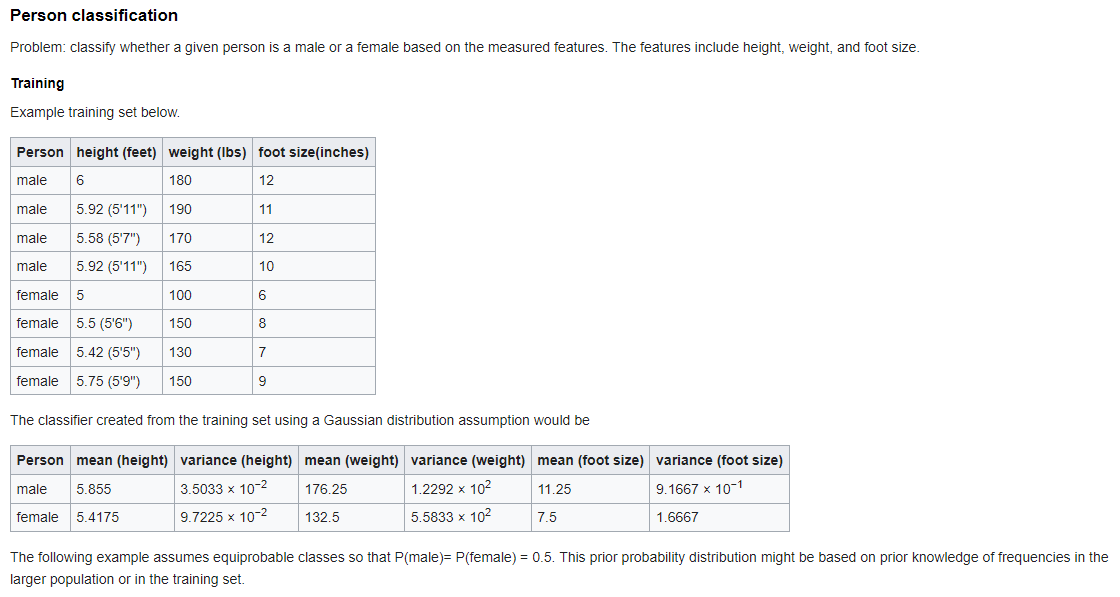

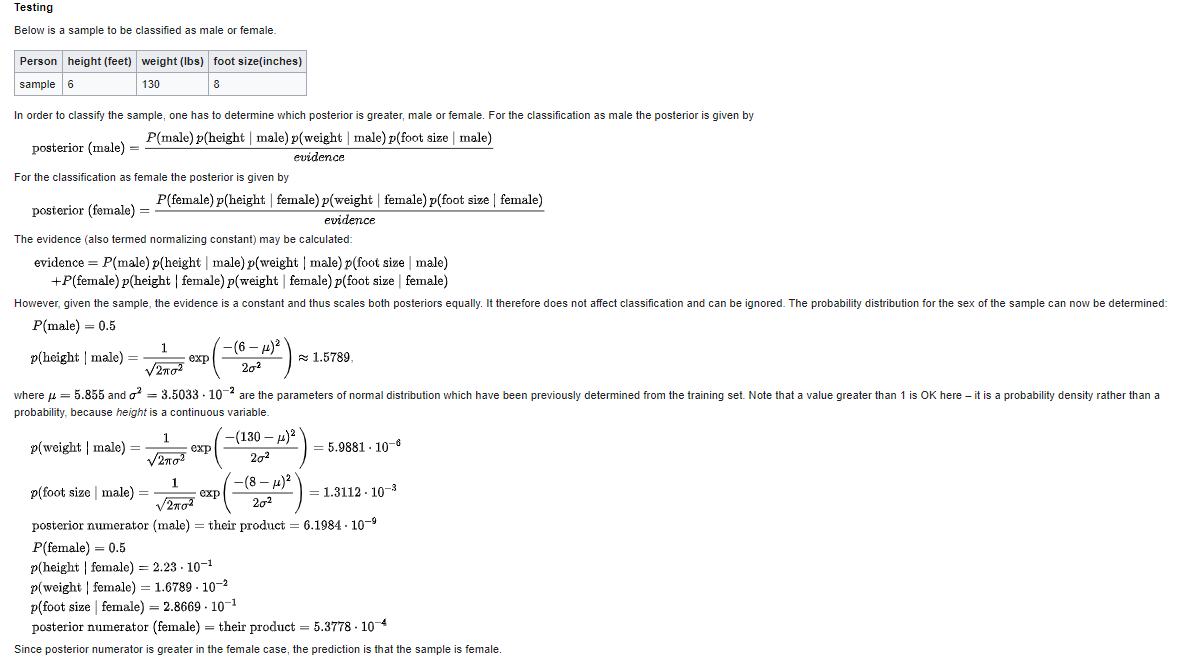

In [ ]:
#Implement and verify the results in Python
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io
dt = pd.read_csv(io.BytesIO(uploaded['MaleFemale.csv']))
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
person_clc=le.fit_transform(dt['Person'])
print(person_clc)
features=[(dt['height'][i],dt['weight'][i],dt['footsize'][i]) for i in range(len(dt))]
print(features)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(features,person_clc)
predicted= model.predict([[6,132,8]])
if predicted==0:
  print("Female Samples:")
else:
  print("Male Samples:")


Saving MaleFemale.csv to MaleFemale (6).csv
[1 1 1 1 0 0 0 0]
[(6.0, 180, 12), (5.92, 190, 11), (5.58, 170, 12), (5.92, 165, 10), (5.0, 100, 6), (5.5, 150, 8), (5.42, 130, 7), (5.75, 150, 9)]
Female Samples:


# 5.Gaussian Naive Bayes on sample dataset

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

# print data(feature)shape
wine.data.shape

# print the wine data features (top 5 records)
print(wine.data[0:5])

# print the wine labels (0:Class_0, 1:class_2, 2:class_2)
print(wine.target)

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

# 6.Advantages and Disadvantages

## Advantages

1.   It is not only a simple approach but also a fast and accurate method for prediction.
2.   Naive Bayes has very low computation cost.
3. It can efficiently work on a large dataset.
4. It performs well in case of discrete response variable compared to the continuous variable
5. It can be used with multiple class prediction problems.
6. It also performs well in the case of text analytics problems.
7. When the assumption of independence holds, a Naive Bayes classifier performs better compared to other models like logistic regression.



##Disadvantages

1.   The assumption of independent features. In practice, it is almost impossible that model will get a set of predictors which are entirely independent.
2.   If there is no training tuple of a particular class, this causes zero posterior probability. In this case, the model is unable to make predictions. This problem is known as Zero Probability/Frequency Problem



# Reflections


1.   Naive Bayes Classification
2. Prior and Conditional Probabilities
2.   Gaussian Naive Bayes
1.   Label Encoding
2.   Advantages and Disadvantages of Naive Bayes





In [ ]:
#@title  { run: "auto", vertical-output: true }
#@title  { run: "auto", vertical-output: true }
name = "Abhijith A Thampi" #@param {type:"string"}
roll_number = "AM.EN.U4AIE20102" #@param {type:"string"}
self_assessment = 7 #@param {type:"slider", min:1, max:10, step:1}
print("Name : ",name)
print("Roll Number : ",roll_number)
print("Self Assessment Marks : ",self_assessment,"/10")

Name :  Abhijith A Thampi
Roll Number :  AM.EN.U4AIE20102
Self Assessment Marks :  7 /10
